In [2]:
import pan
import redas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab
import re

In [8]:


from bokeh.io import output_notebook
from bokeh.sampledata import us_states
from bokeh.plotting import figure, show, output_file, ColumnDataSource
from bokeh.models import HoverTool, Range1d


In [19]:
opioids_drugs = pd.read_csv('/Users/my_macbook/Projects/Project_Capstone/DataSet/opioids.csv')
opioids_prescribers = pd.read_csv('/Users/my_macbook/Projects/Project_Capstone/DataSet/opioids_prescriber_info.csv')


In [20]:
opioids_prescribers.head()

,npi,Gender,State,Credentials,Specialty,ABILIFY,ACETAMINOPHEN.CODEINE,ACYCLOVIR,ADVAIR.DISKUS,AGGRENOX,...,VERAPAMIL.ER,VESICARE,VOLTAREN,VYTORIN,WARFARIN.SODIUM,XARELTO,ZETIA,ZIPRASIDONE.HCL,ZOLPIDEM.TARTRATE,is_Opioid_Prescriber
0,1710982582,M,TX,DDS,Dentist,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1245278100,F,AL,MD,General Surgery,0,0,0,0,0,...,0,0,0,0,0,0,0,0,35,1
2,1427182161,F,NY,M.D.,General Practice,0,0,0,0,0,...,0,0,0,0,0,0,0,0,25,0
3,1669567541,M,AZ,MD,Internal Medicine,0,43,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1679650949,M,NV,M.D.,Hematology/Oncology,0,0,0,0,0,...,0,0,0,0,17,28,0,0,0,1


In [36]:
#explore the prescriber's data, print out the opioid drugs

opioids = list(re.sub(r'[-\s]','.',x) for x in opioids_drugs.values[:,0])
prescribed_opioids = list(set(opioids) & set(opioids_prescribers.columns))

for i,drug in enumerate(prescribed_opioids):
    print (i+1,drug)

#percentage of the opioid drugs prescribers
print (float(opioids_prescribers['is_Opioid_Prescriber'].sum())*100/opioids_prescribers.shape[0],"%")

1 METHADONE.HCL
2 OXYCODONE.HCL
3 MORPHINE.SULFATE.ER
4 MORPHINE.SULFATE
5 HYDROMORPHONE.HCL
6 FENTANYL
7 TRAMADOL.HCL
8 ACETAMINOPHEN.CODEINE
9 HYDROCODONE.ACETAMINOPHEN
10 OXYCODONE.ACETAMINOPHEN
11 OXYCONTIN
58.752 %


In [37]:
#Opioid drug lists
opioids

['ABSTRAL',
 'ACETAMINOPHEN.CODEINE',
 'ACTIQ',
 'ASCOMP.WITH.CODEINE',
 'ASPIRIN.CAFFEINE.DIHYDROCODEIN',
 'AVINZA',
 'BELLADONNA.OPIUM',
 'BUPRENORPHINE.HCL',
 'BUTALB.ACETAMINOPH.CAFF.CODEIN',
 'BUTALB.CAFF.ACETAMINOPH.CODEIN',
 'BUTALBITAL.COMPOUND.CODEINE',
 'BUTORPHANOL.TARTRATE',
 'BUTRANS',
 'CAPITAL.W.CODEINE',
 'CARISOPRODOL.COMPOUND.CODEINE',
 'CARISOPRODOL.ASPIRIN.CODEINE',
 'CODEINE.SULFATE',
 'CO.GESIC',
 'CONZIP',
 'DEMEROL',
 'DEMEROL',
 'DILAUDID',
 'DILAUDID',
 'DILAUDID.HP',
 'DISKETS',
 'DOLOPHINE.HCL',
 'DURAGESIC',
 'DURAMORPH',
 'ENDOCET',
 'ENDODAN',
 'EXALGO',
 'FENTANYL',
 'FENTANYL.CITRATE',
 'FENTORA',
 'FIORICET.WITH.CODEINE',
 'FIORINAL.WITH.CODEINE.#3',
 'HYCET',
 'HYDROCODONE.ACETAMINOPHEN',
 'HYDROCODONE.IBUPROFEN',
 'HYDROMORPHONE.ER',
 'HYDROMORPHONE.HCL',
 'HYDROMORPHONE.HCL',
 'IBUDONE',
 'INFUMORPH',
 'KADIAN',
 'LAZANDA',
 'LEVORPHANOL.TARTRATE',
 'LORCET',
 'LORCET.10.650',
 'LORCET.HD',
 'LORCET.PLUS',
 'LORTAB',
 'MAGNACET',
 'MEPERIDINE.HCL',


In [28]:
opioids_prescribers['NumOpioids'] = opioids_prescribers.apply(lambda x: sum(x[prescribed_opioids]),axis=1)
opioids_prescribers['NumPrescriptions'] = opioids_prescribers.apply(lambda x: sum(x.iloc[5:255]),axis=1)
opioids_prescribers['OpioidVsPrescriptions'] = opioids_prescribers.apply(lambda x: float(x['NumOpioids'])/x['NumPrescriptions'],axis=1)

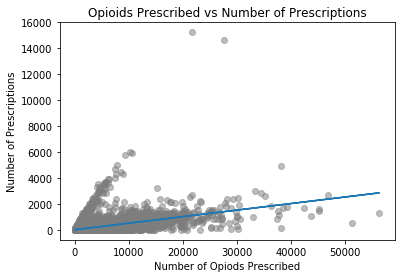

In [29]:
N = opioids_prescribers['NumOpioids'].shape[0]
x = opioids_prescribers['NumPrescriptions']
y = opioids_prescribers['NumOpioids']
colors = (125/255,125/255,125/255)

plt.scatter(x, y, c=colors, alpha=0.5)

m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, '-')

plt.title('Opioids Prescribed vs Number of Prescriptions')
plt.xlabel('Number of Opiods Prescribed')
plt.ylabel('Number of Prescriptions')
plt.show()

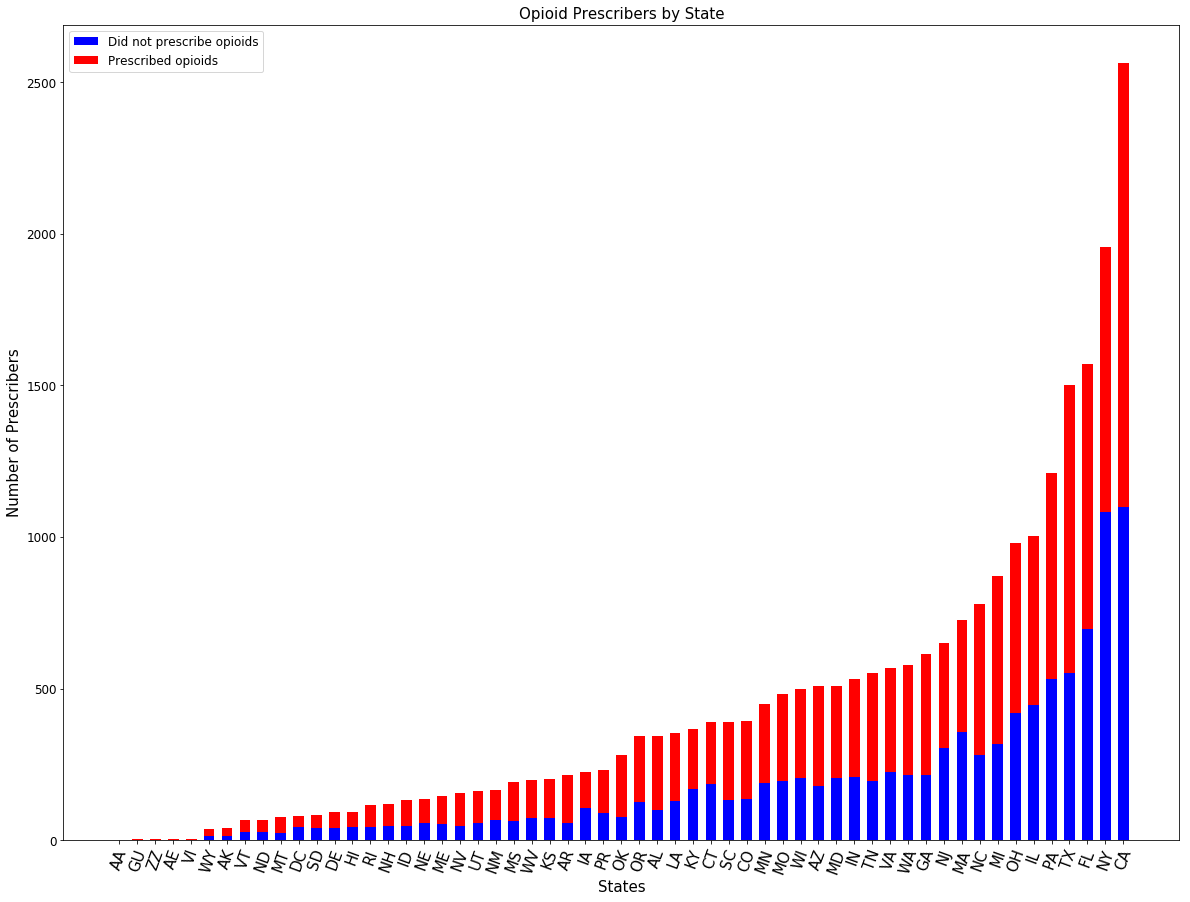

In [32]:
# Opioid Prescribers by State

stateCount = pd.DataFrame(opioids_prescribers[['State','npi']].groupby('State').count())

stateCount.reset_index(level=0, inplace=True)

stateCount.columns = ['State', 'Total_Prescribers']

stateCount_PrescribedOpiods = pd.DataFrame(prescribers.loc[prescribers['is_Opioid_Prescriber']>0,['State','npi']].groupby('State').count())
stateCount_PrescribedOpiods.reset_index(level=0, inplace=True)
stateCount_PrescribedOpiods.columns = ['State', 'Opioid_Prescribers']
stateCount = pd.merge(stateCount, stateCount_PrescribedOpiods,  how='left', on="State")

stateCount = stateCount.fillna(0)

stateCount = stateCount.sort_values('Total_Prescribers')

fig = plt.gcf()
fig.set_size_inches( 20, 15)

N = stateCount.shape[0]
ind = np.arange(N)
width = 0.6

p1 = plt.bar(ind, stateCount['Total_Prescribers']-stateCount['Opioid_Prescribers'], width, color='b')
p2 = plt.bar(ind, stateCount['Opioid_Prescribers'], width, bottom=stateCount['Total_Prescribers']-stateCount['Opioid_Prescribers'], color='r')

# plt.ylim([0,120])
plt.yticks(fontsize=12)
plt.ylabel("Number of Prescribers", fontsize=15)
plt.xticks(ind,stateCount['State'], fontsize=15, rotation=70)
plt.xlabel('States', fontsize=15)
plt.title("Opioid Prescribers by State", fontsize=15)
plt.legend([p1[0], p2[0]], ["Did not prescribe opioids","Prescribed opioids"], fontsize=12, fancybox=True)
plt.show()



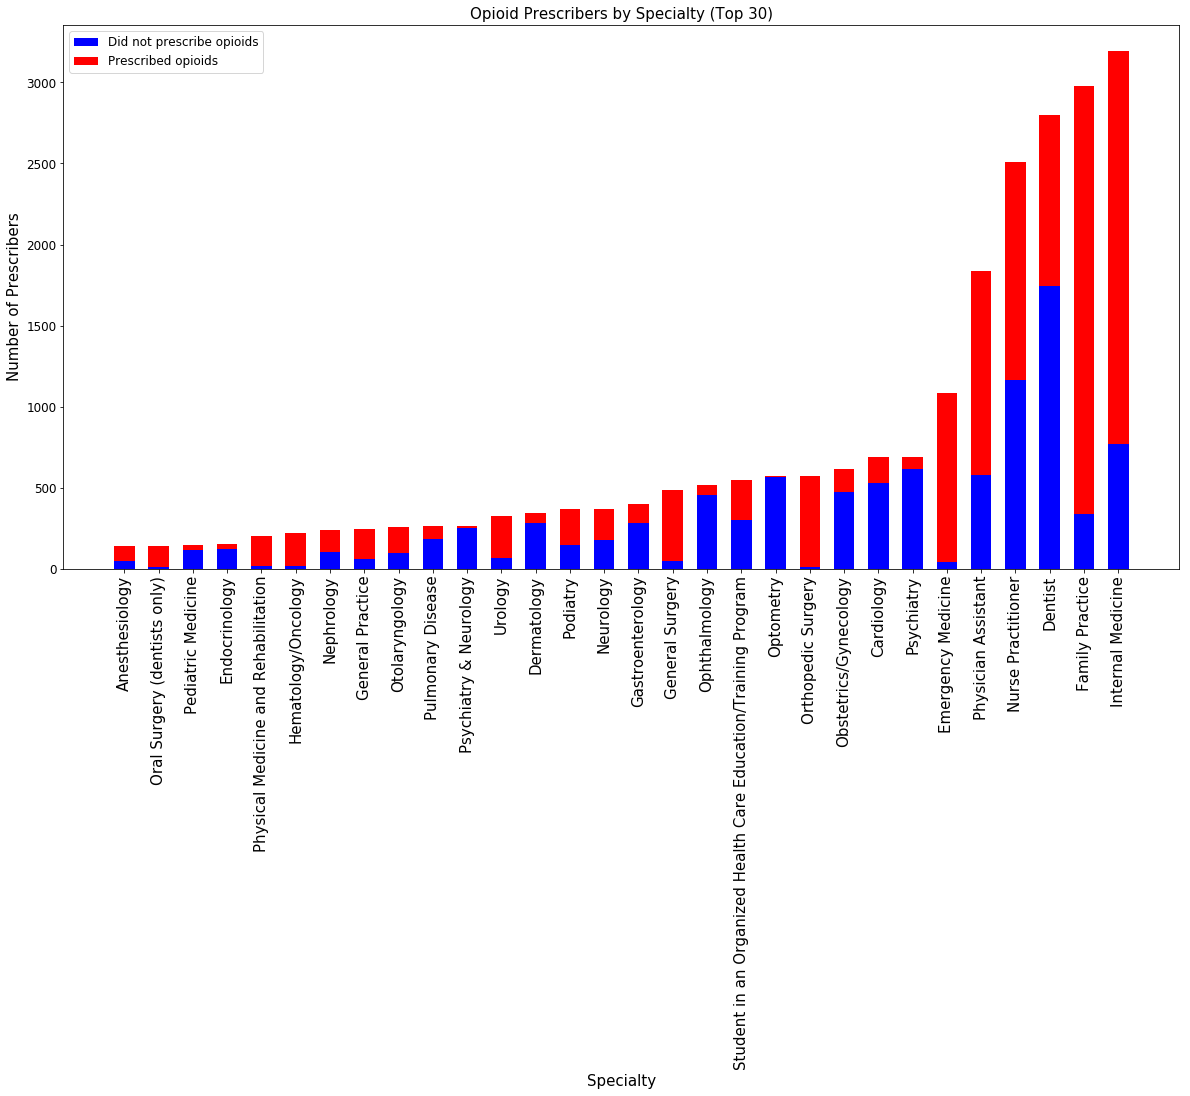

In [34]:
# Opioid Prescribers by Specialty

SpecialtyCount = pd.DataFrame(opioids_prescribers[['Specialty','npi']].groupby('Specialty').count())

SpecialtyCount.reset_index(level=0, inplace=True)

SpecialtyCount.columns = ['Specialty', 'Total_Prescribers']

SpecialtyCount_PrescribedOpiods = pd.DataFrame(prescribers.loc[prescribers['is_Opioid_Prescriber']>0,['Specialty','npi']].groupby('Specialty').count())
SpecialtyCount_PrescribedOpiods.reset_index(level=0, inplace=True)

SpecialtyCount_PrescribedOpiods.columns = ['Specialty', 'Opioid_Prescribers']
SpecialtyCount = pd.merge(SpecialtyCount, SpecialtyCount_PrescribedOpiods,  how='left', on="Specialty")

SpecialtyCount = SpecialtyCount.fillna(0)

SpecialtyCount = SpecialtyCount.sort_values('Total_Prescribers')

SpecialtyCount = SpecialtyCount[-30::]

fig = plt.gcf()
fig.set_size_inches( 20, 10)

N = SpecialtyCount.shape[0]
ind = np.arange(N)
width = 0.6

p1 = plt.bar(ind, SpecialtyCount['Total_Prescribers']-SpecialtyCount['Opioid_Prescribers'], width, color='b')
p2 = plt.bar(ind, SpecialtyCount['Opioid_Prescribers'], width, bottom=SpecialtyCount['Total_Prescribers']-SpecialtyCount['Opioid_Prescribers'], color='r')

# plt.ylim([0,120])
plt.yticks(fontsize=12)
plt.ylabel("Number of Prescribers", fontsize=15)
plt.xticks(ind,SpecialtyCount['Specialty'], fontsize=15, rotation=90)
plt.xlabel('Specialty', fontsize=15)
plt.title("Opioid Prescribers by Specialty (Top 30)", fontsize=15)
plt.legend([p1[0], p2[0]], ["Did not prescribe opioids","Prescribed opioids"], fontsize=12, fancybox=True)
plt.show()